# Clasificación con el Algoritmo K Nearest Neighbors



**Objetivo:**
Aplicar el algoritmo de *K-Nearest Neighbors (KNN)* para clasificar reseñas en función de su número de palabras y su valor de sentimiento.

**Contexto:**
Disponemos de un dataset `reviews_sentiment.csv` que contiene 257 registros con Opiniones de usuarios sobre una app (Reviews)
Cada reseña tiene asignado un número de palabras (`wordcount`), una puntuación de sentimiento (`sentimentValue`) y una valoración global (`Star Rating`).

Para este ejercicio vamos a trabajar con **257 reseñas de usuarios sobre una aplicación**. Usaremos **dos columnas de datos** para alimentar nuestro algoritmo.

Solo emplearemos **dos características (features)** porque queremos poder **representarlas en un gráfico de dos dimensiones**. En un caso real, normalmente usaríamos **más variables** para obtener resultados más precisos, pero aquí lo hacemos con fines didácticos.

Las dos columnas que utilizaremos son:

* **wordcount**: la cantidad de palabras que tiene cada opinión.
* **sentimentValue**: un valor que va de **-4 a 4** y que indica si el comentario tiene un tono **negativo o positivo**.

Como **etiquetas** (labels) usaremos las **estrellas** que los usuarios dieron a la app (de **1 a 5**). En general, **más estrellas** suelen reflejar un **sentimiento positivo**, aunque no siempre coincide exactamente.


## 1. Importanción de librerías

En este bloque de código estamos **preparando el entorno de trabajo** importando todas las librerías que usaremos:

* **pandas** y **numpy** → para manejar y procesar los datos.
* **matplotlib** y **seaborn** → para crear gráficas y visualizar los resultados.
* Los comandos de configuración (`%matplotlib inline`, `plt.rcParams`, `plt.style.use`) sirven para **mostrar las gráficas dentro del notebook** y darles un estilo visual agradable.
* **scikit-learn (sklearn)** → para trabajar con el algoritmo de *machine learning* (en este caso, el **K-Nearest Neighbors** o KNN), dividir los datos en conjuntos de entrenamiento y prueba, escalar variables y evaluar el modelo con métricas como precisión, matriz de confusión y reporte de clasificación.

En resumen, con este bloque dejamos listas las herramientas necesarias para manejar datos, graficar y entrenar nuestro modelo.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<div style="background-color:green;color:white">

## 2. Cargar y explorar los datos

Carga en un dataframe el reviews_sentiment.csv y muestra las primeras 10 filas. ¿De qué trata este dataset? Utiliza funciones de EDA para entender su contenido y sus opciones.

In [47]:
# Cargar el dataset
df = pd.read_csv("./data/reviews_sentiment.csv", delimiter=";")

# Mostrar las primeras filas
df.head(10)


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [48]:
# Mostrar la información del DataFrame
df.info


<bound method DataFrame.info of                    Review Title  \
0                  Sin conexión   
1                  faltan cosas   
2    Es muy buena lo recomiendo   
3               Version antigua   
4                     Esta bien   
..                          ...   
252        Muy buena aplicacion   
253                       Buena   
254                        Wuau   
255                   Muy buena   
256                       Sg S5   

                                           Review Text  wordcount  \
0    Hola desde hace algo más de un mes me pone sin...         23   
1                   Han mejorado la apariencia pero no         20   
2                                 Andres e puto amoooo          4   
3    Me gustana mas la version anterior esta es mas...         17   
4                      Sin ser la biblia.... Esta bien          6   
..                                                 ...        ...   
252                                   Muy buena genial          

In [49]:
# mostrar estadísticas descriptivas
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


<div style="background-color:green;color:white">

¿Qué representa cada variable del conjunto de datos?

¿Hay valores atípicos o ausentes que podrían afectar al modelo?

- Wordcount: Palabras en la reseña.
- Star Rating: Puntuación usando un sistema de estrellas (de 1 a 5).
- Sentiment Value: La puntuación que determina si una reseña es positiva (si el valor es positivo) o negativa (si es negativa) entre -4 y 4.

Existen outliers fuertes en wordcount. El resto parece medianamente normalizado, aunque parezca que existe un ligero sesgo a la derecha.

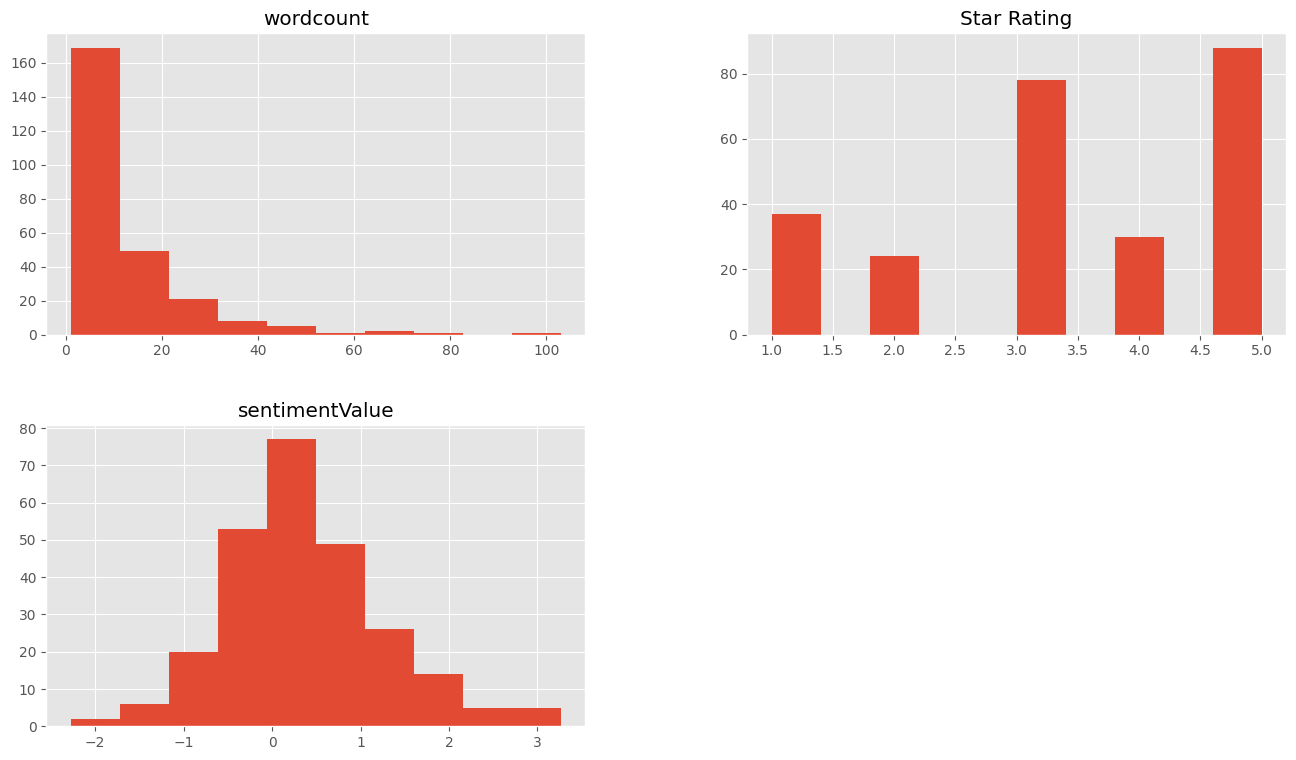

In [50]:
# Mostrar histogramas de las características
df.hist()
plt.show()

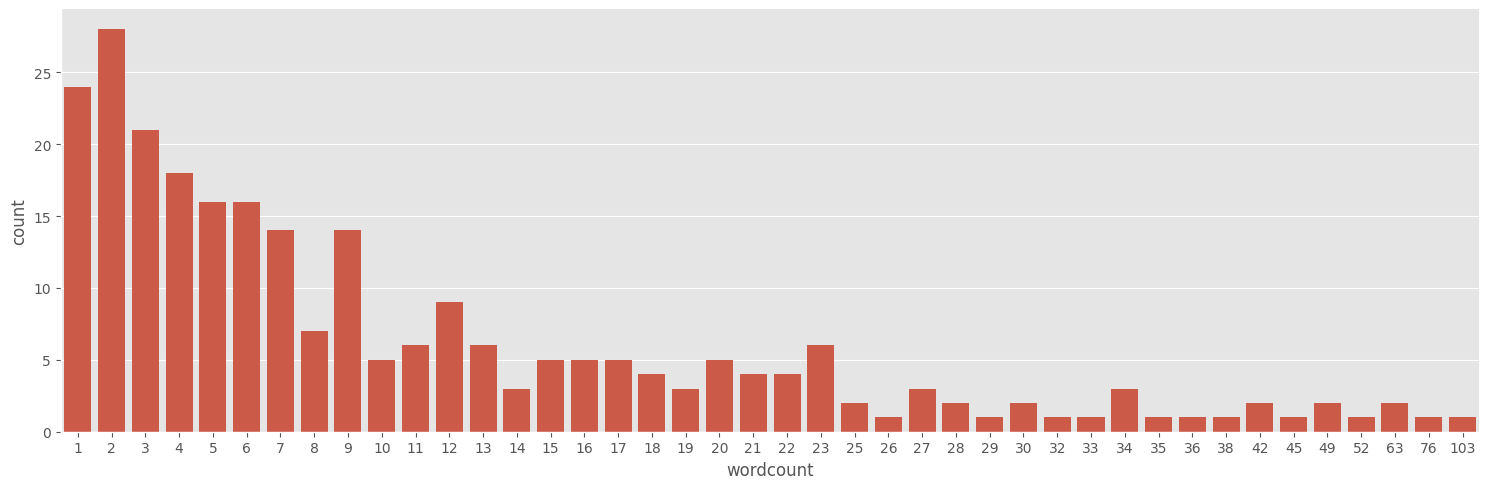

In [51]:
# Mostrar gráfico de conteo de la columna 'wordcount'
sb.catplot(x='wordcount', data=df, kind='count', aspect=3, )


## 2. Preparación de los datos

<div style="background-color:green;color:white">

### 2.1 Seleccionar las variables de entrada y salida

Primero vamos a limpiar los valores.

In [52]:
df.isna().sum()

Review Title       0
Review Text        0
wordcount          0
titleSentiment    26
textSentiment      0
Star Rating        0
sentimentValue     0
dtype: int64

In [53]:
df.corr(numeric_only=True)

,wordcount,Star Rating,sentimentValue
wordcount,1.000000,-0.402059,-0.347232
Star Rating,-0.402059,1.000000,0.792180
sentimentValue,-0.347232,0.792180,1.000000


En titleSentiment tenemos 26 valores nulos. Esta columna es la que determina si una review es positiva o negativa. Podríamos utilizar los valores de sentimentValue (donde no hay nulos) para rellenar estos huecos. Como hemos dicho, la puntuación va de -4 a 4, por lo que suponemos que si es menor de 0 es negativa y si es mayor a 0 es positiva.

Lo cierto es que esta columna no la vamos a utilizar porque para predecir el Star Rating podemos hacer uso del sentimentValue directamente y de wordcount, ya que parece que a mayor cantidad de palabras, peor suele ser la reseña.

In [54]:
y = df["Star Rating"]
x = df[["wordcount", "sentimentValue"]]

print(f"Y: {y.shape}")
print(f"X: {x.shape}")

Y: (257,)
X: (257, 2)


<div style="background-color:green;color:white">

### 2.2 Dividir en conjuntos de entrenamiento y prueba

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<div style="background-color:green;color:white">

### 2.3 Normalizar los datos

El KNN se basa en distancias, por lo que es necesario escalar las variables con z-score

In [56]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<div style="background-color:green;color:white">


## 3. Creación del modelo

Entrenar el modelo KNN con 5 vecinos

In [57]:
# Crear modelo con K=5
knn = KNeighborsClassifier(5)

In [58]:
# Entrenar el modelo
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [59]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(x_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(x_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.87


## 4.  Evaluar el modelo

In [60]:
y_pred = knn.predict(x_test_scaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.8653846153846154

Matriz de confusión:
 [[ 9  1  0  0  0]
 [ 0  2  0  0  0]
 [ 2  1 11  0  0]
 [ 0  1  1  5  0]
 [ 0  0  1  0 18]]

Informe de clasificación:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.87        52
   macro avg       0.81      0.87      0.81        52
weighted avg       0.90      0.87      0.87        52



## 5. Gráficos de la clasificación obtenida

Ahora vamos a graficar los resultados de la clasificación. Esta visualización nos permite ver de forma clara cómo se distribuyen las predicciones en función de las dos variables utilizadas.

Como solo usamos dos características (features), podemos representarlas en un gráfico 2D. Si tuviéramos tres, podríamos hacerlo en 3D, aunque en casos reales, con muchas más dimensiones, lo importante no sería la visualización sino el rendimiento del modelo.

In [61]:
# Parámetros
n_neighbors = 5
h = 0.05  # Paso de la malla (más grande = menos resolución)

# Creamos algunos datos de ejemplo (X, y)
# Sustituir por los reales
# X = datos con 2 características
# y = etiquetas de clase
# clf.fit(X, y) debe haberse hecho antes si ya tienes tus datos

# Colores más contrastados y limpios
cmap_light = ListedColormap(['#FFCCCC', '#FFD580', '#FFFABF', '#B3E6FF', '#BFFFBF'])
cmap_bold  = ListedColormap(['#E60000', '#FF8000', '#CCCC00', '#0099CC', '#00B300'])

# Entrenamiento del clasificador
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
clf.fit(x, y)

# Creamos la malla del plano para visualizar las fronteras de decisión
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicción de la clase para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figura
plt.figure(figsize=(8, 6))

# Fondo coloreado por clases
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Puntos reales de entrenamiento
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                      edgecolor='k', s=50, alpha=0.9)

# Límites del gráfico
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Etiquetas automáticas según las clases detectadas
clases = np.unique(y)
colores = cmap_bold.colors[:len(clases)]
legend_patches = [mpatches.Patch(color=colores[i], label=f'Clase {clases[i]}') for i in range(len(clases))]
plt.legend(handles=legend_patches, title='Clases', loc='upper right')

# Título
plt.title(f"Clasificación KNN (K={n_neighbors}, pesos='distance')", fontsize=13)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.tight_layout()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)


En el gráfico se distinguen **cinco zonas** que muestran la relación entre la **cantidad de palabras** (`wordcount`) y el **valor de sentimiento** (`sentimentValue`) de cada reseña.

![](img/knn-clasification-sectores.png)


Podemos interpretarlas así:

* Una reseña con unas **20 palabras** y un **sentimiento cercano a 1** se ubicaría en la zona **celeste**, correspondiente aproximadamente a una valoración de **4 estrellas**.

A partir de estas regiones se pueden intuir algunos **patrones de comportamiento de los usuarios**:

* **1 estrella:** comentarios con **sentimiento negativo** y hasta **25 palabras**.
* **2 estrellas:** usuarios que **se extienden mucho** (hasta 100 palabras) y cuyo sentimiento varía entre **negativo y ligeramente positivo**.
* **3 estrellas:** reseñas **neutrales** (sentimiento cerca de 0) con unas **25 palabras** aproximadamente.
* **5 estrellas:** opiniones **muy positivas** (sentimiento desde 0.5 en adelante) y **breves**, con menos de **10 palabras**.

En conjunto, estas zonas permiten **visualizar cómo las emociones y la extensión del texto influyen en la puntuación final** que los usuarios otorgan a la aplicación.


## 6. Cálculo del mejor K

En el algoritmo KNN, el número de vecinos (k) indica cuántos puntos cercanos se tienen en cuenta para clasificar un nuevo dato.

Si k es muy pequeño (por ejemplo, 1 o 2) → el modelo se adapta demasiado a los datos de entrenamiento (sobreajuste).

Si k es muy grande → el modelo se vuelve demasiado general y pierde precisión (subajuste).

Por eso probamos distintos valores de k y medimos cuál da mayor precisión en los datos de prueba.
El k que consigue el mejor equilibrio es el que ofrece mayor capacidad de generalización.

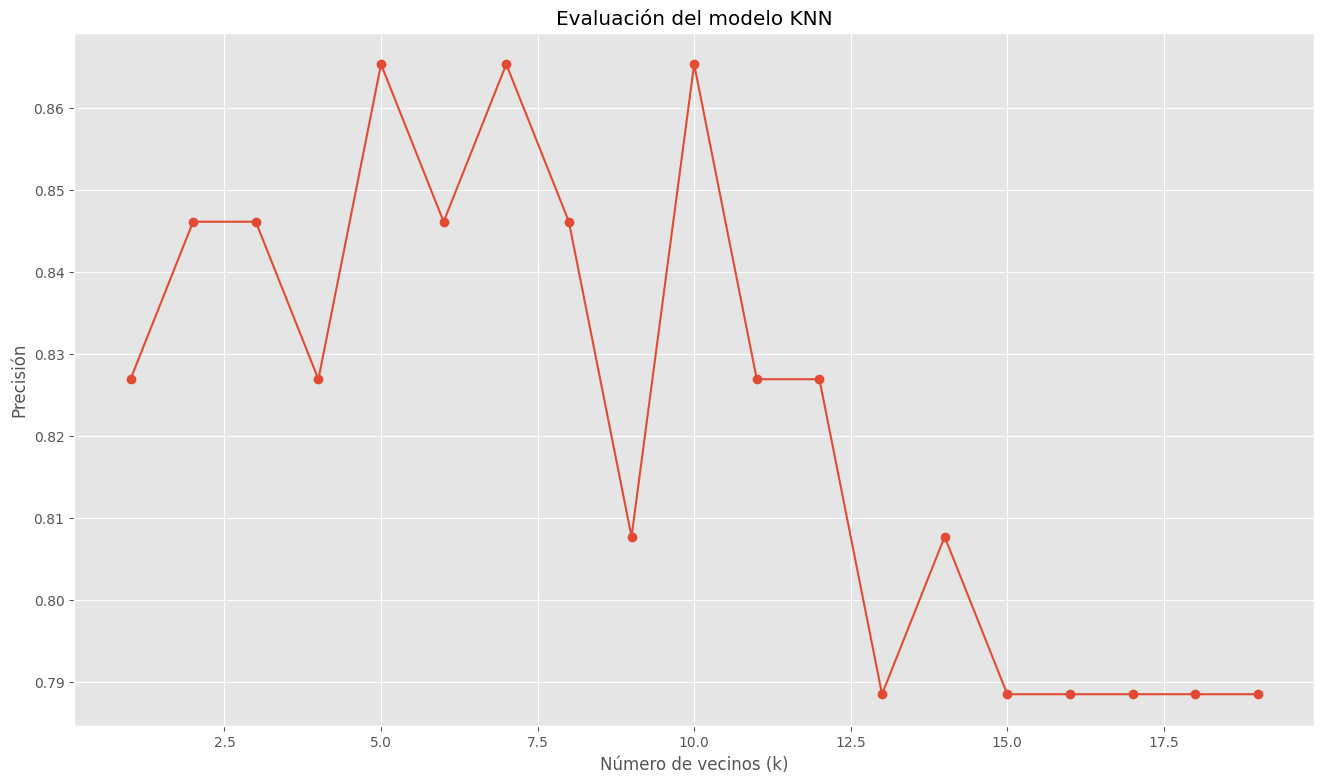

Mejor valor de k: 5 con precisión 0.87


In [62]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    scores.append(knn.score(x_test_scaled, y_test))

plt.figure()
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.title('Evaluación del modelo KNN')
plt.show()

best_k = k_range[scores.index(max(scores))]
print(f"Mejor valor de k: {best_k} con precisión {max(scores):.2f}")

## 7. Cálculo de predicciones

Vamos a pedir al modelo KNN (clf) que haga una predicción del número de estrellas para un nuevo punto con dos características:

- 5 → Representa el número de palabras (wordcount)

- 1.0 → El valor del sentimiento (sentimentValue), muy positivo

In [63]:
print(clf.predict([[5, 1.0]]))

[5]


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Esto significa que, según los datos aprendidos,
una reseña con pocas palabras (5) pero sentimiento muy positivo (1.0)
probablemente obtendría una valoración de 5 estrellas.

Ahora vamos a utilizar el método ``predict_proba`` que no devuelve la clase directamente, sino las probabilidades de pertenecer a cada una de las clases posibles.

In [64]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00249744 0.02527227 0.97223028 0.         0.        ]]


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


En el ejemplo, para una reseña con **20 palabras** y un **sentimiento neutro (0.0)**, el resultado fue:

| Estrellas | Probabilidad |
| --------- | ------------ |
| ⭐ 1       | 0.4%         |
| ⭐ 2       | 2.5%         |
| ⭐ 3       | **97.1%**    |
| ⭐ 4       | 0%           |
| ⭐ 5       | 0%           |

El modelo calcula la **probabilidad de que una reseña pertenezca a cada categoría de estrellas** (de 1 a 5) según sus características.

El modelo considera que esa reseña tiene una **altísima probabilidad (97%) de corresponder a 3 estrellas**, lo que indica una **valoración intermedia o neutral**.

En resumen, cuando el comentario no expresa ni sentimientos muy positivos ni negativos y tiene una extensión media, el modelo predice una calificación **moderada (3 estrellas)**.


## **Ejercicio : Diagnóstico de diabetes con KNN**

### 🎯 Objetivo

Entrenar un modelo de **clasificación supervisada** usando el algoritmo **K-Nearest Neighbors (KNN)** para predecir si una persona presenta **diabetes (1)** o no (0), según distintas medidas clínicas.

---

### 📘 Contexto

El dataset `diabetes.csv` contiene observaciones médicas de mujeres mayores de 21 años con las siguientes variables:

| Variable                 | Descripción                                |
| ------------------------ | ------------------------------------------ |
| Pregnancies              | Número de embarazos                        |
| Glucose                  | Nivel de glucosa en sangre                 |
| BloodPressure            | Presión arterial diastólica                |
| SkinThickness            | Espesor del pliegue cutáneo (mm)           |
| Insulin                  | Nivel de insulina (mu U/ml)                |
| BMI                      | Índice de masa corporal                    |
| DiabetesPedigreeFunction | Factor hereditario (riesgo genético)       |
| Age                      | Edad (años)                                |
| Outcome                  | 1 = tiene diabetes / 0 = no tiene diabetes |


---
<div style="background-color:green;color:white">

## Paso 1. Cargar y explorar los datos

In [77]:
df = pd.read_csv("./data/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
# mostrar la información del DataFrame
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [79]:
# Eliminar valores repetidos en cada columna
duplicates = df.duplicated().sum()
df.drop_duplicates()
print(f"Se han eliminado {duplicates} valores.")

Se han eliminado 0 valores.


In [80]:
# Mostrar estadísticas descriptivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
# Verificar valores nulos en el DataFrame
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div style="background-color:green;color:white">

**Preguntas:**

* ¿Hay datos repetidos o nulos?
* ¿Existen outliers?
* Hay más proporción de clase 0 (no diabetes) que con clase 1 (con diabetes 1)

- No hay ni datos repetidos ni nulos.
- Existen outliers fuertes en `Pregnancies`, `Insulin`. Existe algún dato en 0 en columnas que no tiene demasiado sentido que sean 0 como `BloodPressure`, `Glucose` o `BMI`.
- Hay más proporción de gente que no tiene diabetes. Lo podemos ver en la media, que es de 0.34. Claramente los datos de gente que no es diabética está bajando la proporción.

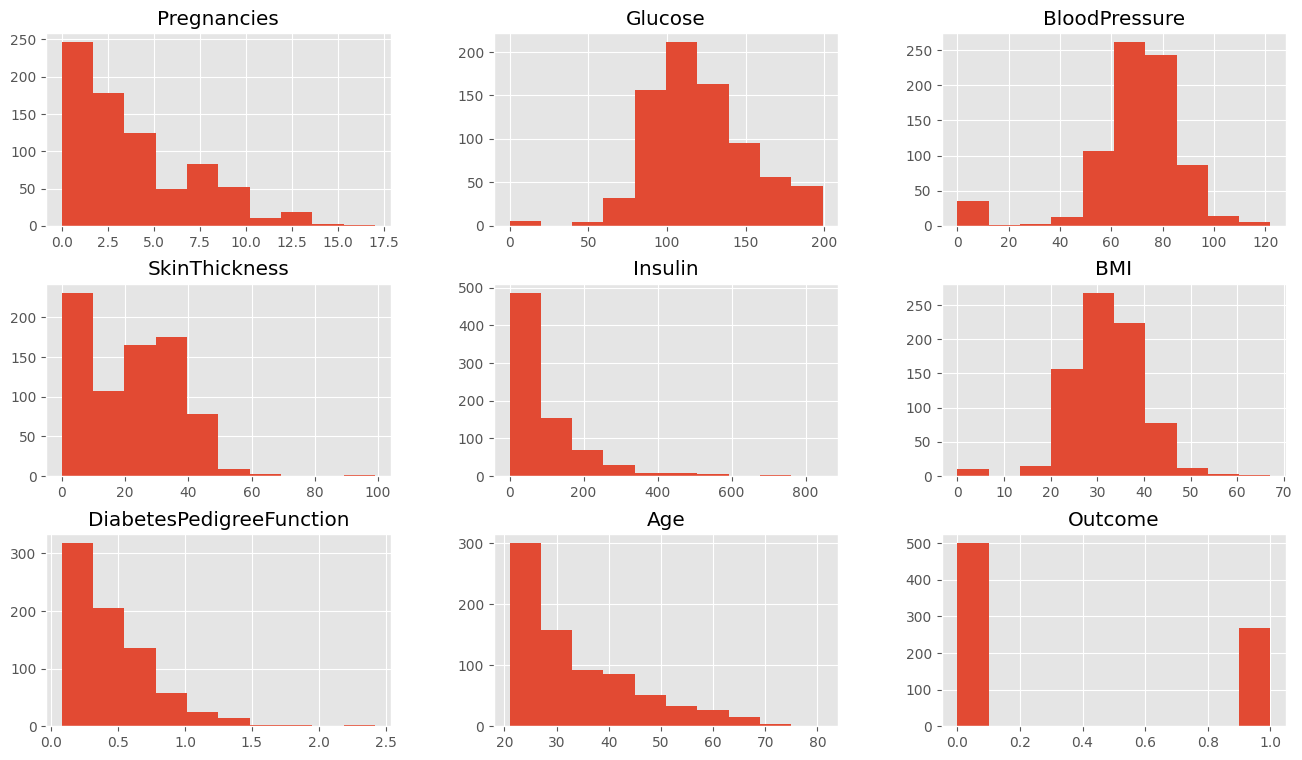

In [81]:
df.hist()
plt.show()

Vamos a limpiar los valores que parecen atípicos a primera vista (los ceros en algunas columnas valores grandes en embarazos o insulina).

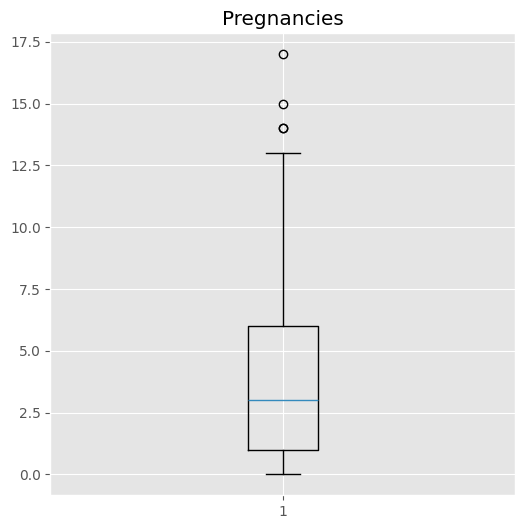

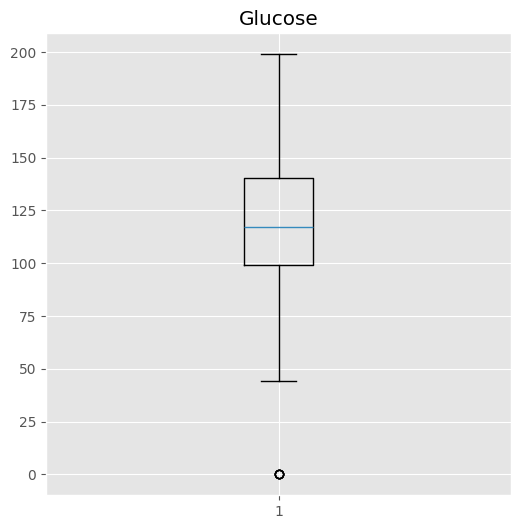

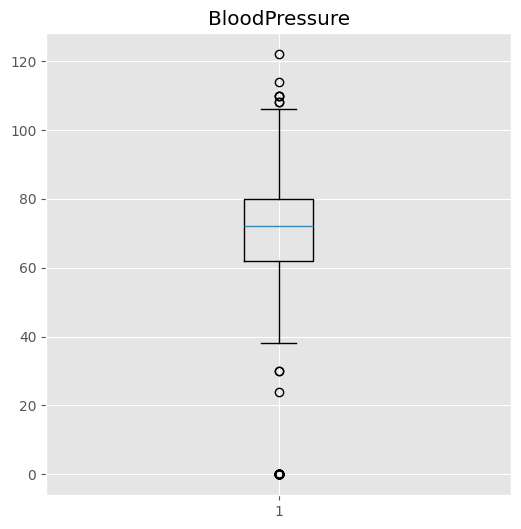

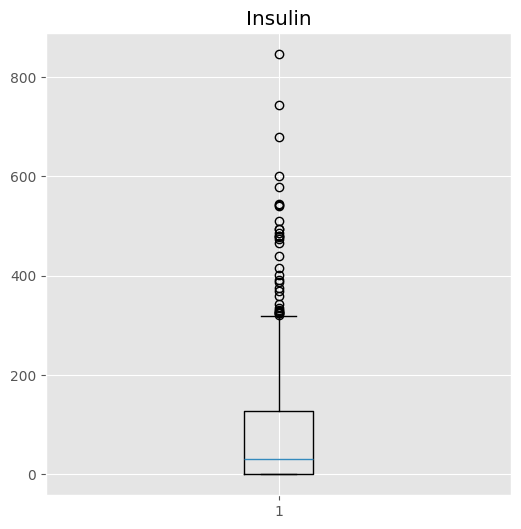

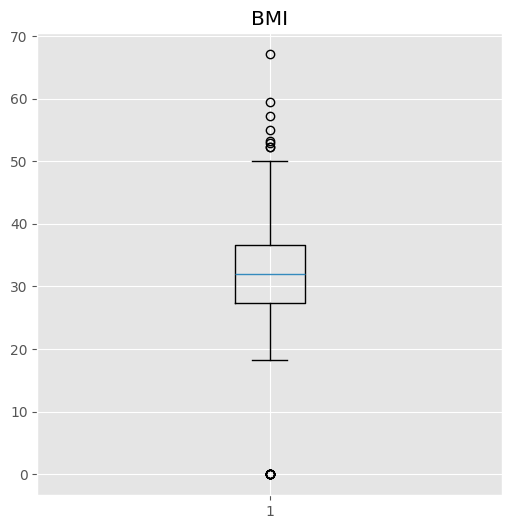

In [82]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI"]

for col in columns:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.boxplot(df[col])
    plt.show()
    

Vamos a sustituir los valores en 0 de `Glucose`, `BloodPressure` y `BMI` por la media ya que los datos están bastante simétricos en los histogramas.

Vamos a susituir los valores en 0 de `Insulin` por la moda porque los datos están muy sesgados hacia la izquierda y así los intentamos simetrizar un poco más.

En `Pregnancies` vamos a aplicar un clipping.

In [83]:
# Columnas a sustituir por la media
mean_cols = ["Glucose", "BloodPressure", "BMI"]

for col in mean_cols:
    # Calculo la media sin tener en cuenta los valores que sean 0 y sustituyo los ceros
    mean = df.loc[df[col] > 0, col].mean()
    df.loc[df[col] <= 0, col] = mean

# Misma lógica que antes pero con la media y solo con la columna de insulina
median = df.loc[df["Insulin"] > 0, "Insulin"].median()
df.loc[df["Insulin"] <= 0, "Insulin"] = median

# Clipping para pregnancies
low_quantile = df["Pregnancies"].quantile(0.1) # Va a ser 0
high_quantile = df["Pregnancies"].quantile(0.9)
df["Pregnancies"].clip(low_quantile, high_quantile, inplace=True)

/tmp/ipykernel_638/2704074858.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] <= 0, col] = mean
/tmp/ipykernel_638/2704074858.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] <= 0, col] = mean
/tmp/ipykernel_638/2704074858.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [84]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136082,0.210959,-0.099483,0.033257,0.002513,-0.036385,0.557224,0.221354
Glucose,0.136082,1.000000,0.218367,0.075031,0.419064,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.210959,0.218367,1.000000,0.006114,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,-0.099483,0.075031,0.006114,1.000000,0.183368,0.380774,0.183928,-0.113970,0.074752
Insulin,0.033257,0.419064,0.045087,0.183368,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.002513,0.230941,0.281268,0.380774,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.036385,0.137060,-0.002763,0.183928,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.557224,0.266534,0.324595,-0.113970,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221354,0.492928,0.166074,0.074752,0.203790,0.311924,0.173844,0.238356,1.000000


<div style="background-color:green;color:white">

### Paso 2. Seleccionar variables relevantes

Eliminar la columna (axis=1) Outcome de X y dejar en y solo la columna Outcome

In [85]:
y = df["Outcome"]
x = df.drop(columns=["Outcome"])

print(f"x: {x.shape}")
print(f"y: {y.shape}")

x: (768, 8)
y: (768,)


<div style="background-color:green;color:white">

### Paso 3. Dividir en entrenamiento y prueba

Asegurarse de manenter la misma proporción de clases con el parámetro stratify

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

<div style="background-color:green;color:white">

### Paso 4. Normalizar los datos

KNN depende de las distancias, así que es importante escalar las variables:


In [87]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<div style="background-color:green;color:white">

###  Paso 5. Entrenar el modelo con un valor inicial de K

In [88]:
knn = KNeighborsClassifier(3)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(x_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(x_test_scaled, y_test)))

y_pred = knn.predict(x_test_scaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.71
Precisión del modelo: 0.7077922077922078

Matriz de confusión:
 [[78 22]
 [23 31]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.58      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



<div style="background-color:green;color:white">

**Preguntas:**

* ¿La precisión es parecida entre entrenamiento y prueba?
* ¿Qué pasaría si usas un valor de *k* más alto o más bajo?

- La precisión entre entrenamiento y test varía ligeramente. En entrenamiento es de 0.85 y en test de 0.71.

- Al incrementar el valor de k la precisión aumenta. Y al bajar el valor de k la precisión disminuye.

### Paso 6. Buscar el mejor valor de K

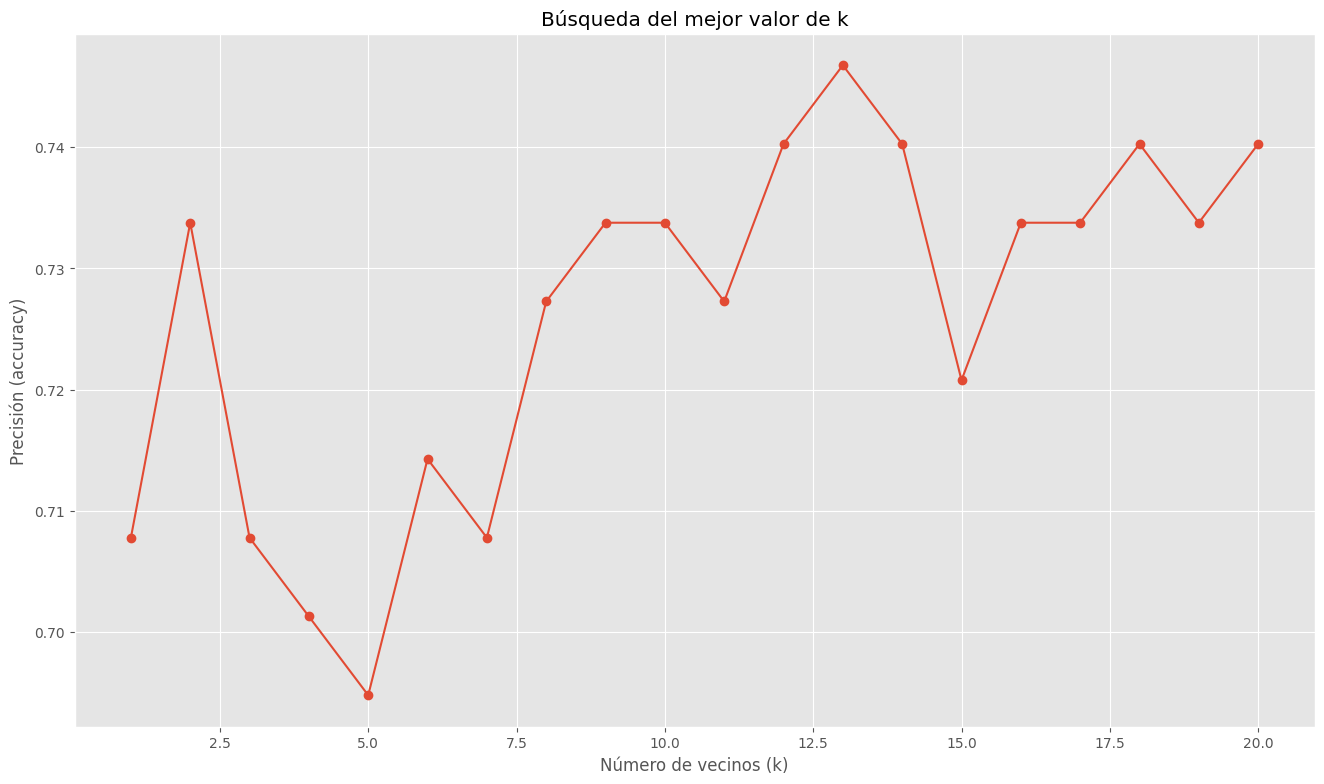

Mejor k: 13 con precisión 0.75


In [90]:
import matplotlib.pyplot as plt

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    scores.append(knn.score(x_test_scaled, y_test))

plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión (accuracy)')
plt.title('Búsqueda del mejor valor de k')
plt.show()

best_k = k_range[scores.index(max(scores))]
print(f"Mejor k: {best_k} con precisión {max(scores):.2f}")

<div style="background-color:green;color:white">

### Paso 7. Entrenar de nuevo el modelo con el valor óptimo de K


In [91]:
# Entrenar el modelo final con el mejor valor de k encontrado
knn = KNeighborsClassifier(best_k)

knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

<div style="background-color:green;color:white">

### Paso 8. Evaluar el modelo de clasificación

Una vez entrenado el modelo con el mejor valor de k, debemos comprobar cómo de bien distingue entre películas exitosas y no exitosas.

#### 1. Matriz de confusión

In [92]:
y_pred = knn.predict(x_test_scaled)

print(f"Matriz de confusión:\n {confusion_matrix(y_test, y_pred)}")

Matriz de confusión:
 [[84 16]
 [23 31]]


<div style="background-color:green;color:white">

#### 2. Informe de clasificación

In [93]:
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



<div style="background-color:green;color:white">

#### 3. Precisión general

In [94]:
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Precisión del modelo: 0.7467532467532467


<div style="background-color:green;color:white">

**Reflexión**

1. ¿Qué variables parecen influir más en el diagnóstico (glucosa, IMC, edad...)?
2. ¿Qué valor de *k* produjo mejores resultados?
3. ¿Qué tipo de errores comete el modelo (falsos positivos o negativos)?
4. ¿Por qué crees que es importante normalizar los datos antes de usar KNN?

1. Las variables que más parecen influir son el IMC (`BMI`), `Glucose` y, en menor medida, la edad (`Age`).
2. 13
3. Mete más falsos positivos que falsos negativos. En algo con tanta responsabilidad como la salud es mejor prevenir que curar, por lo que es aceptable.
4. KNN utiliza la similitud con respecto a la distancia entre los valores, por lo que si tenemos distancias muy grandes va desestabilizar el modelo. Para ello normalizamos para dejar unas distancias comparables fácilmente y que no metan ruido en el modelo.

### Breves conclusiones a mayores

He hecho diferentes pruebas:

- Al principio no apliqué ningún tratamiento a los datos más allá de eliminar valores nulos y duplicados. Separé en `train` y `test` todas las variables y probé el modelo. Aunque la presión en entrenamiento subía una centésima (`0.86`) respecto a la siguiente prueba, metía más falsos negativos y positivos y el recall era más bajo.

- Después apliqué el tratamiento que está reflejado en el cuaderno (modificar los valores que estaban en 0 por la media o la mediana, dependiendo de la columna y aplicar un clipping en `Pregnancies`). La precisión del modelo, tanto la de predicciones como la de entrenamiento bajó una centésima cada una (`0.74` y `0.85` respectivamente), pero clasificó mucho mejor los casos, detectando más negativos y, por lo tanto, no metiendo tantos falsos positivos y no metiendo falsos negativos y aumentando el número de positivos, mientras el recall subía un poco.

Creo que este último modelo es más fiable que el primero, pero harían falta más datos para poder comprobarlo realmente.

<div style="background-color:green;color:white">

### Paso 8. redicción de nuevos pacientes

Una vez entrenado y evaluado el modelo KNN, queremos utilizarlo para diagnosticar nuevos casos clínicos.

Disponemos de dos pacientes cuyas características médicas han sido registradas.

Tu tarea consiste en predecir si cada uno de ellos presenta diabetes o no según los valores introducidos.

### 🧍‍♀️ **Paciente 1**

* **Embarazos:** 5
* **Glucosa:** 165
* **Presión arterial:** 85
* **Espesor de piel:** 25
* **Insulina:** 130
* **IMC:** 35.5
* **Pedigree:** 0.63
* **Edad:** 45

👉 Se sospecha que presenta síntomas de diabetes.

---

### 🧍‍♂️ **Paciente 2**

* **Embarazos:** 1
* **Glucosa:** 90
* **Presión arterial:** 70
* **Espesor de piel:** 20
* **Insulina:** 85
* **IMC:** 22.5
* **Pedigree:** 0.35
* **Edad:** 28

👉 Se sospecha que **no presenta diabetes**.

In [95]:
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

paciente_1 = {
    "Pregnancies" : 5,
    "Glucose": 165,
    "BloodPressure": 85,
    "SkinThickness": 23,
    "Insulin": 130,
    "BMI": 35.5,
    "DiabetesPedigreeFunction": 0.63,
    "Age": 45,
}

paciente_2 = {
    "Pregnancies" : 1,
    "Glucose": 90,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 85,
    "BMI": 22.5,
    "DiabetesPedigreeFunction": 0.35,
    "Age": 28,
}

pacientes = pd.DataFrame([paciente_1, paciente_2])

pacientes_norm = scaler.transform(pacientes)

predictions = knn.predict(pacientes_norm)
i = 1
for pred in predictions:
    if pred == 0:
        print(f"El paciente {i} no tiene diabetes.")
    else:
        print(f"El paciente {i} tiene diabetes.")
    i += 1

El paciente 1 tiene diabetes.
El paciente 2 no tiene diabetes.


# Webgrafia

* [Documentación scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html#classification)
* [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* [Libro "Hands on Machine Learning with ScikitLearn, Keras y TensorFlow" de Aurelien Geron y su repositorio de ejemplos ](https://github.com/ageron/handson-ml)
* [Aprende ML de Juan Ignacio Bagnato](https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)
* [Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
* [DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.